# 20180008 - 20180256
# Autoencoder

In [1]:
import keras
from keras import layers

embed_filter_c = 4

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(100, (3, 3), activation=layers.LeakyReLU(), padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x) #(28,28 to 14,14)

x = layers.Conv2D(20, (3, 3), activation=layers.LeakyReLU(), padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

encoded = layers.Conv2D(embed_filter_c, (3, 3), activation=layers.LeakyReLU(),padding='same')(x)

x = layers.UpSampling2D((2, 2))(encoded)
x = layers.Conv2D(20, (3, 3), activation=layers.LeakyReLU(),padding='same')(x)

x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(100, (3, 3), activation=layers.LeakyReLU(),padding='same')(x)

decoded = layers.Conv2D(1, (2, 2), activation=layers.LeakyReLU(), padding='same')(x)
print("Model Structure\n------------------------------------")
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

2021-11-21 20:40:52.890873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model Structure
------------------------------------
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        18020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           724       
_________________________________________________________________
up_sampl

2021-11-21 20:40:53.007937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 20:40:53.008636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 20:40:53.009707: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-21 20:40:53.019206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train,
                epochs=30, #5, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
#                 ,verbose =0)
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

11501568/11490434 [==============================] - 0s 0us/step


2021-11-21 20:40:56.418875: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2021-11-21 20:40:57.637743: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - 12s 13ms/step - loss: 0.0123 - val_loss: 0.0050
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 7/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0022 - val_loss: 0.0021

# Encoder

In [3]:
encoder = keras.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test)

print("Encoder Structure\n------------------------------------")
encoder.summary()

Encoder Structure
------------------------------------
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        18020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           724       
Total params: 19,744
Trainable params: 19,744
Non-trainable params: 0


# Decoder

In [4]:
decoder_input = keras.Input(shape=(7,7,embed_filter_c))
n5 = autoencoder.layers[-5](decoder_input)
n4 = autoencoder.layers[-4](n5)
n3 = autoencoder.layers[-3](n4)
n2 = autoencoder.layers[-2](n3)
n1 = autoencoder.layers[-1](n2)
decoder = keras.Model(decoder_input,n1)

decoded_imgs = decoder.predict(encoded_imgs)
print("Decoder Structure\n------------------------------------")
decoder.summary()

Decoder Structure
------------------------------------
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 7, 4)]         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 20)        740       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 100)       18100     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         401       
Total params: 19,241
Trainable params: 19,241
Non-trainable params: 0


# Visualization

In [5]:
from random import seed
from random import random
# seed random number generator
seed(3245)
K = 10
r = int(random()*(10000-K))
r

4409

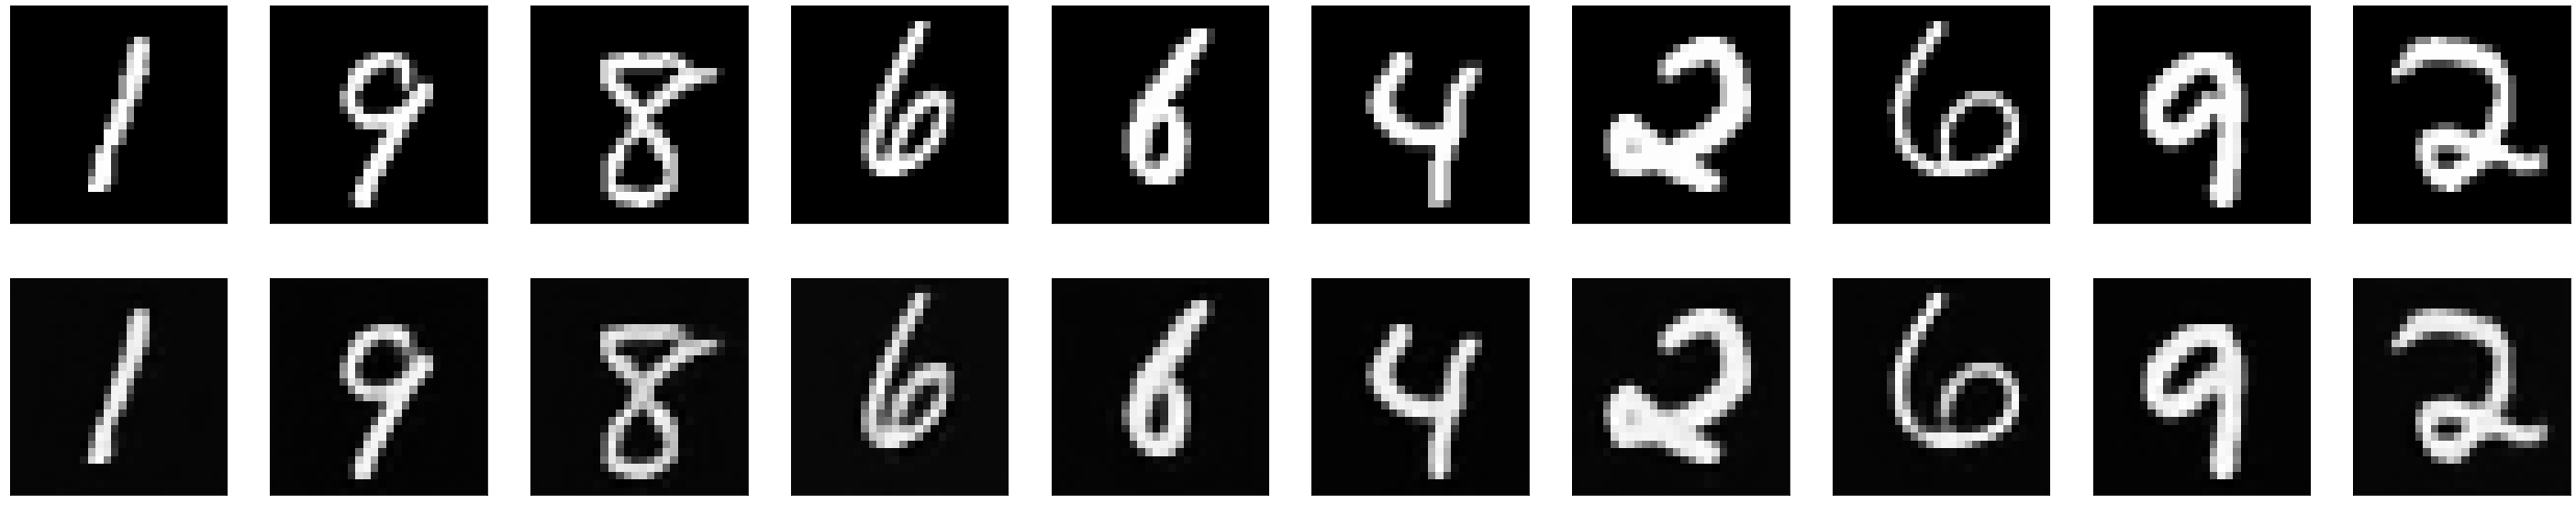

Encodings 7*7*4


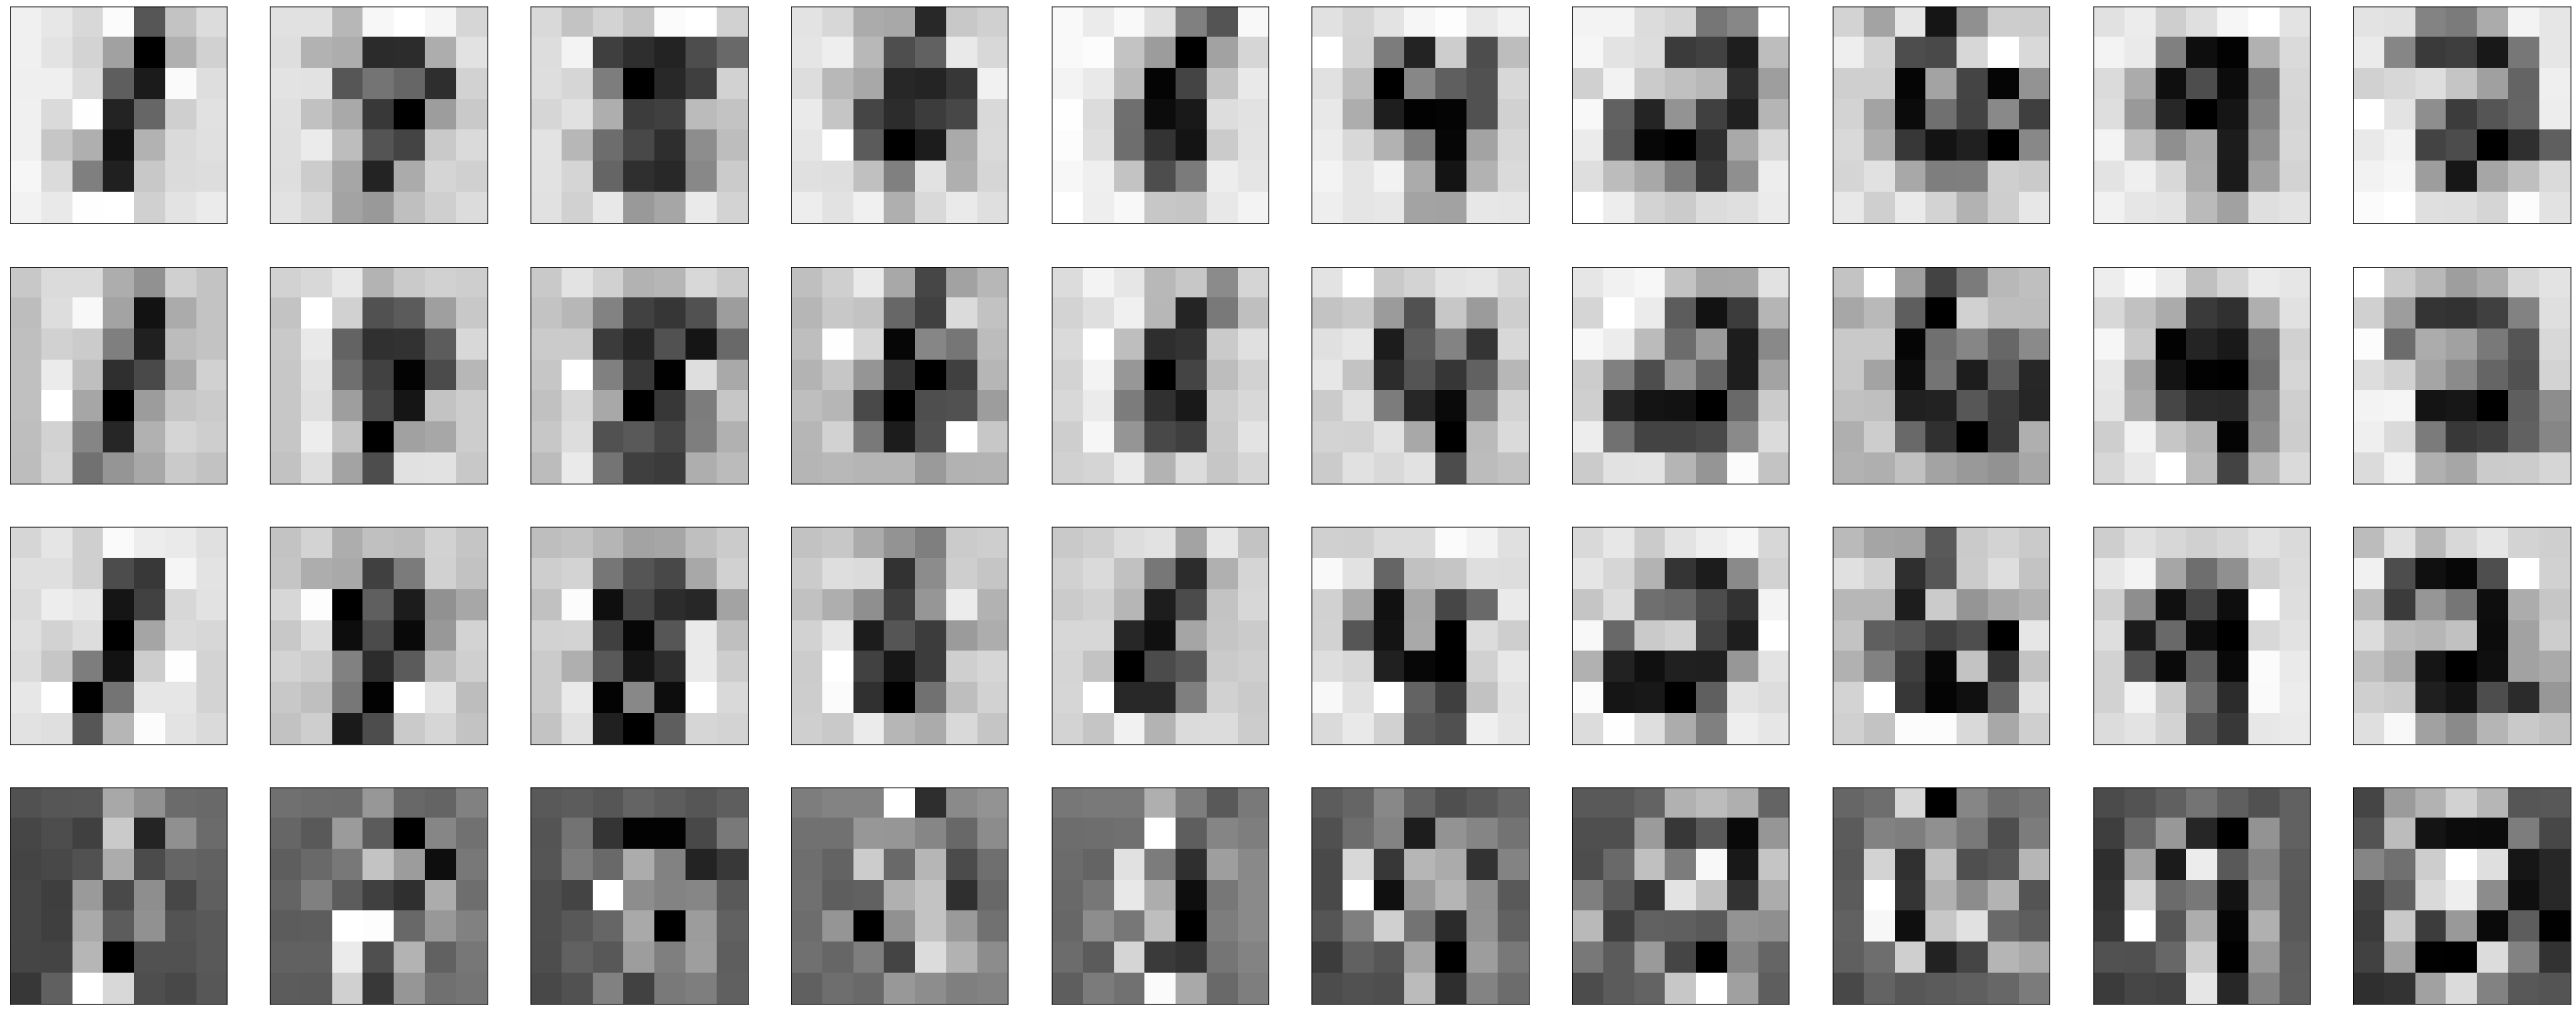

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(K*5, 10))
for i in range(r, K + r):
    # Display original
    ax = plt.subplot(2, K, i-r+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, K, i - r+1  + K)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Encodings 7*7*"+str(embed_filter_c))
fig, ax = plt.subplots(embed_filter_c,K,figsize=(5*K,embed_filter_c*5))
for k in range(embed_filter_c):
    for i in range(1, K + 1):
        ax[k,i-1].imshow(encoded_imgs[i+r-1,:,:,k])
        plt.gray()
        ax[k,i-1].get_xaxis().set_visible(False)
        ax[k,i-1].get_yaxis().set_visible(False)
plt.show()